# Using seurat to get differentially expressed genes in each cluster

Since we did all the pre-processing steps manually, we will have to rerun them here in the seurat object. Notice the steps: 1) create object 2) normalize data 3) find variable genes 4) scale data 5) run PCA 6) run tSNE 7) find clusters. We are not going to talk about any of these commands since this was done manually already. Copy and paste until the FindMarkers section!

In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix


In [2]:
data = read.csv("/home/ucsd-train02/projects/single_cell_intestine/results/counts_filtered.csv",
               row.names=1)
dim(data)
head(data)

[1] 5355 1385

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,⋯,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,,0,1,0,1,0,0,3,0,0,3
Tcea1,0,0,0,0,0,0,0,0,0,0,,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
Rb1cc1,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,2,0
Rrs1,0,2,0,2,2,0,0,0,1,0,,0,0,1,1,0,0,1,1,2,0


In [3]:
intestine = CreateSeuratObject(raw.data=data)

In [4]:
intestine = NormalizeData(intestine)

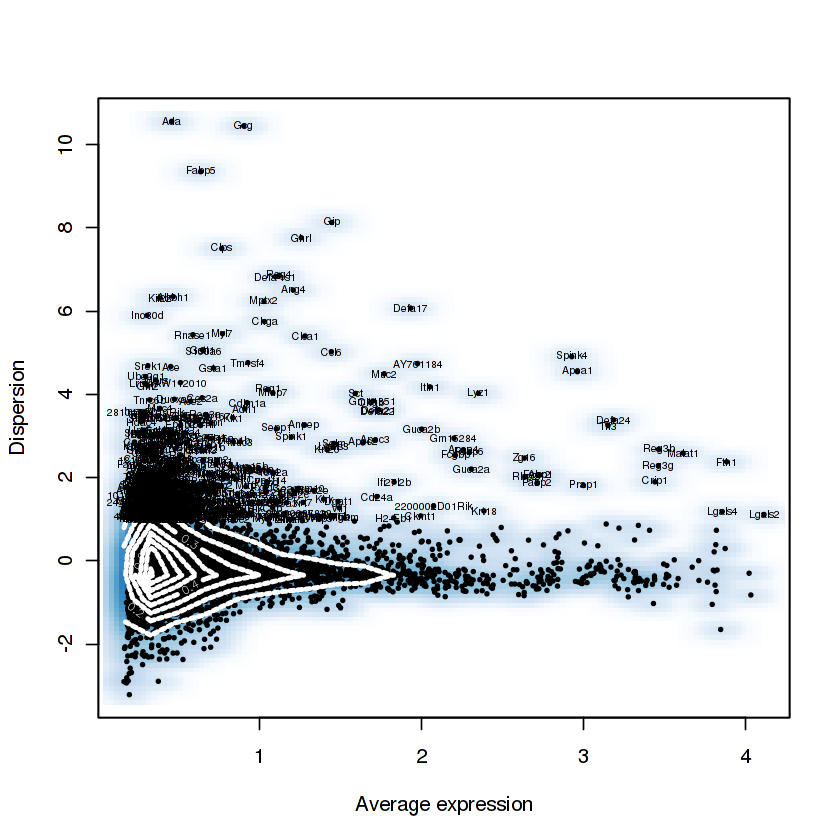

In [5]:
intestine = FindVariableGenes(intestine, x.low.cutoff = 0.1)

In [6]:
intestine <- ScaleData(intestine, genes.use = intestine@var.genes, model.use = "negbinom")


[1] "Scaling data matrix"
  |======================================================================| 100%


In [7]:
intestine <- RunPCA(intestine, pcs.compute = 30, weight.by.var = FALSE)

[1] "PC1"
 [1] "Lgals2"        "Krt18"         "Wbp5"          "Cd24a"        
 [5] "Slc12a2"       "Sox4"          "Smoc2"         "Ceacam10"     
 [9] "Tmem176b"      "Marcksl1"      "Fxyd3"         "Igfbp4"       
[13] "Sox9"          "Ngfrap1"       "Vars"          "2810417H13Rik"
[17] "Phlda1"        "Cbx5"          "Gkn3"          "Top2a"        
[21] "Prim1"         "Rrp15"         "Limk2"         "Sfrp5"        
[25] "Krt7"          "Mybbp1a"       "Mfge8"         "Maged1"       
[29] "Rgcc"          "Hells"        
[1] ""
 [1] "Anpep"         "Mep1b"         "Apoc3"         "Spink1"       
 [5] "Rbp2"          "Apoa1"         "Cyp4f14"       "Ace2"         
 [9] "Ces2e"         "Crip1"         "Dpep1"         "Cst6"         
[13] "Adh6a"         "2200002D01Rik" "Clec2h"        "Apoa4"        
[17] "Fabp1"         "Slc26a6"       "Cyp3a13"       "Ace"          
[21] "Cndp2"         "Krt20"         "Creb3l3"       "Slc27a4"      
[25] "Mogat2"        "Slc51b"        "Guca2b"    

In [8]:
intestine <- RunTSNE(intestine, dims.use = 1:30, do.fast = T)

In [9]:
intestine <- FindClusters(intestine, reduction.type = "pca", dims.use = 1:19, save.SNN = T)

[1] "Constructing SNN"
  |======================================================================| 100%


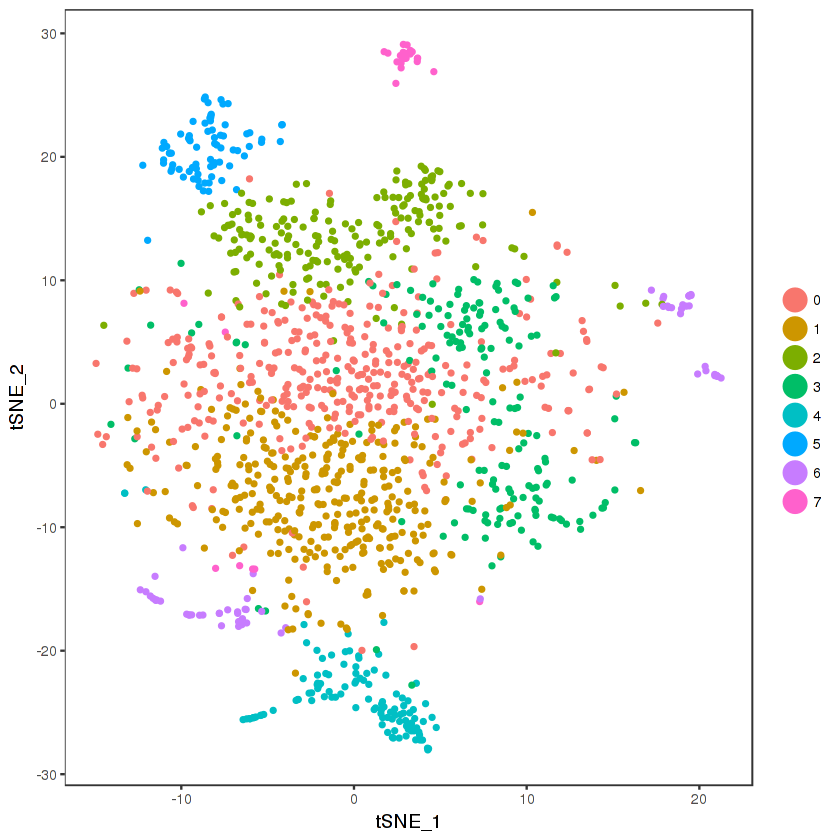

In [10]:
TSNEPlot(intestine)

# Find marker genes for each cluster

Check out a detailed explanation of the wilcoxin rank sum test [here](https://www.stat.auckland.ac.nz/~wild/ChanceEnc/Ch10.wilcoxon.pdf). 

Read more about the FindMarkers function in Seurat [here](http://satijalab.org/seurat/pbmc3k_tutorial_1_4.html) (scroll down to the section called "Finding differentially expressed genes"). Take a look at the command below, what can you learn from the documentation about how the differential expression is being calculated? 

In [23]:
cluster0.markers <- FindMarkers(intestine, ident.1 = 0, test.use = "wilcox", min.diff.pct = 0.2)

In [36]:
cluster0.markers

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Dmbt1,9.459833e-39,0.7475111,0.879,0.611,5.065740e-35
Hmgb2,1.481182e-24,0.4622996,0.860,0.656,7.931728e-21
Phlda1,1.118320e-20,-0.6745301,0.062,0.303,5.988605e-17
2810417H13Rik,2.154605e-20,0.5382975,0.544,0.293,1.153791e-16
Krt20,5.669774e-19,-1.0076685,0.237,0.463,3.036164e-15
Rbp7,6.266714e-18,0.5637942,0.482,0.257,3.355825e-14
Guca2a,9.152301e-17,-1.5493353,0.321,0.530,4.901057e-13
Fxyd3,1.500971e-16,-0.8977842,0.140,0.353,8.037701e-13
Tspan13,6.119224e-14,-0.6379905,0.175,0.380,3.276844e-10
Myo15b,7.333682e-14,-0.5280798,0.170,0.374,3.927186e-10


In [25]:
cluster1.markers <- FindMarkers(intestine, ident.1 = 1, test.use = "wilcox", min.diff.pct = 0.2)

In [41]:
head(cluster1.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Ifitm3,2.950712e-105,1.3001560,0.960,0.538,1.580106e-101
Slc12a2,1.430586e-71,0.9329166,0.822,0.333,7.660788e-68
Ifitm2,9.408627e-67,0.7171852,0.958,0.734,5.038320e-63
Amica1,6.914349e-64,0.8918322,0.797,0.341,3.702634e-60
Clca3b,8.194433e-61,0.7375836,0.972,0.703,4.388119e-57
Gkn3,3.810445e-60,1.0580395,0.449,0.079,2.040493e-56


In [44]:
cluster2.markers <- FindMarkers(intestine, ident.1 = 2, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster2.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
St3gal4,1.042947e-84,1.3876407,0.927,0.337,5.584980e-81
Slc51a,1.226269e-82,1.2706778,0.752,0.157,6.566672e-79
Apol10a,4.503231e-75,1.0648069,0.762,0.172,2.411480e-71
2200002D01Rik,2.138439e-67,0.9371522,0.985,0.682,1.145134e-63
Car4,1.226021e-65,1.1183877,0.665,0.156,6.565344e-62
Gsdmc4,1.888940e-62,1.0992978,0.607,0.125,1.011527e-58


In [27]:
cluster3.markers <- FindMarkers(intestine, ident.1 = 3, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster3.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Cenpf,1.918790e-76,1.0378324,0.565,0.067,1.027512e-72
Top2a,1.781950e-71,1.3967261,0.827,0.233,9.542342e-68
Ube2c,8.080694e-68,1.5910429,0.845,0.314,4.327211e-64
Kif22,3.289682e-61,1.1175418,0.530,0.079,1.761625e-57
Aurka,9.213494e-59,0.7967166,0.518,0.077,4.933826e-55
Aurkb,8.572493e-55,0.8257248,0.488,0.071,4.590570e-51


In [31]:
cluster4.markers <- FindMarkers(intestine, ident.1 = 4, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster4.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Lrrc26,2.058700e-121,1.487874,0.754,0.054,1.102434e-117
Fkbp11,2.243767e-112,1.479184,0.711,0.052,1.201537e-108
Mmp7,4.193896e-97,2.705650,0.825,0.119,2.245831e-93
Creb3l1,9.202019e-86,1.245049,0.693,0.077,4.927681e-82
Klk1,6.036114e-85,2.127513,0.851,0.159,3.232339e-81
Selm,1.746165e-84,2.108633,0.956,0.242,9.350714e-81


In [38]:
cluster5.markers <- FindMarkers(intestine, ident.1 = 5, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster5.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Ace2,1.366798e-105,2.299791,0.855,0.076,7.319205e-102
Ace,1.970522e-104,2.119084,0.803,0.064,1.055215e-100
Creb3l3,4.258308e-103,1.819930,0.803,0.061,2.280324e-99
Espn,1.745903e-90,1.804802,0.895,0.099,9.349312e-87
Dpep1,1.436024e-84,1.816362,0.789,0.083,7.689910e-81
Mep1b,3.642021e-75,2.163190,0.934,0.171,1.950302e-71


In [39]:
cluster6.markers <- FindMarkers(intestine, ident.1 = 6, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster6.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Tm4sf4,1.954690e-59,2.121472,0.831,0.128,1.046736e-55
Hepacam2,2.556634e-43,1.521070,0.738,0.136,1.369077e-39
Ddc,3.778659e-41,1.727388,0.862,0.255,2.023472e-37
Marcksl1,1.229565e-40,1.851112,0.831,0.224,6.584321e-37
Fxyd3,2.494212e-40,1.567062,0.923,0.265,1.335651e-36
Rph3al,3.253594e-40,1.309483,0.615,0.102,1.742300e-36


In [40]:
cluster7.markers <- FindMarkers(intestine, ident.1 = 7, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster7.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Espn,1.184466e-44,2.110161,0.935,0.124,6.342817e-41
Ptpn6,2.711721e-44,2.029693,0.839,0.096,1.452127e-40
Reep5,1.813103e-41,2.314869,0.871,0.117,9.709168e-38
Hepacam2,1.970271e-38,1.622504,0.968,0.146,1.055080e-34
Atp2a3,1.396671e-34,1.670649,0.774,0.104,7.479171e-31
Inpp5j,4.203955e-34,1.278571,0.774,0.097,2.251218e-30


Let's save all of these results to a file using the write.table function 

In [42]:
write.table(cluster0.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster0_markers.csv",
           sep=",")
write.table(cluster1.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster1_markers.csv",
           sep=",")
write.table(cluster2.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster2_markers.csv",
           sep=",")
write.table(cluster3.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster3_markers.csv",
           sep=",")
write.table(cluster4.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster4_markers.csv",
           sep=",")
write.table(cluster5.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster5_markers.csv",
           sep=",")
write.table(cluster6.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster6_markers.csv",
           sep=",")
write.table(cluster7.markers, file="/home/ucsd-train02/projects/single_cell_intestine/results/cluster7_markers.csv",
           sep=",")


**Visual inspection of the results**

Let's take a look at the top hit (sorted on smallest adjusted p value) for each result and plot violins. We can also overlay the expression values on the cells visualized with tSNE.

Warning message:
"'vlnPlot' is deprecated.
Use 'VlnPlot' instead.
See help("Deprecated") and help("Seurat-deprecated")."

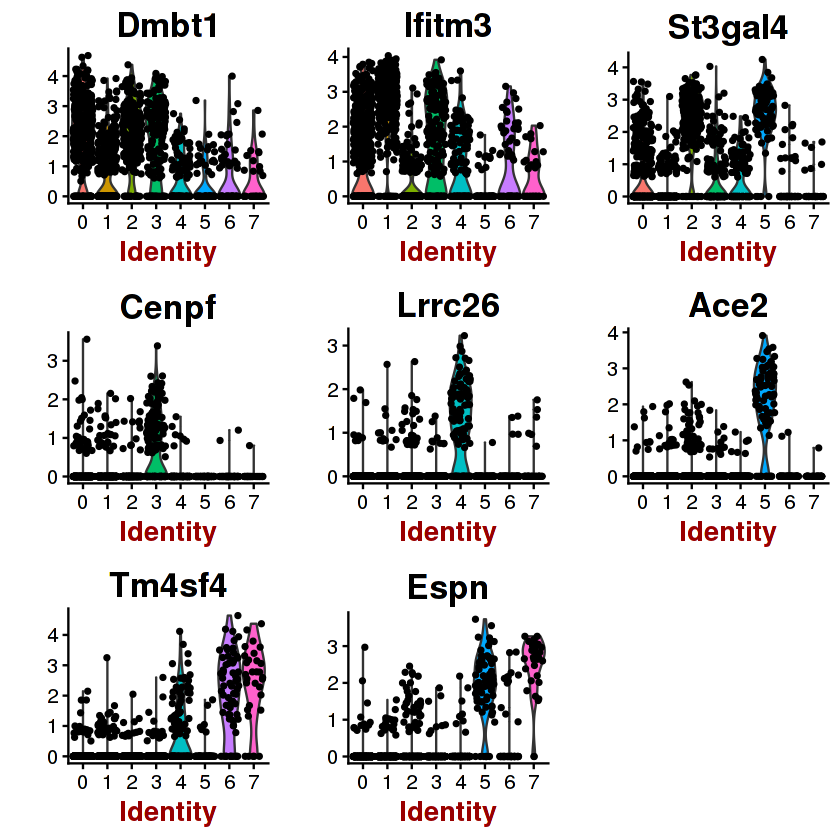

In [47]:
par(mfrow=c(1,2))

genes.viz=c('Dmbt1','Ifitm3','St3gal4','Cenpf','Lrrc26','Ace2','Tm4sf4','Espn')
vlnPlot(intestine, genes.viz)

Warning message:
"'feature.plot' is deprecated.
Use 'FeaturePlot' instead.
See help("Deprecated") and help("Seurat-deprecated")."

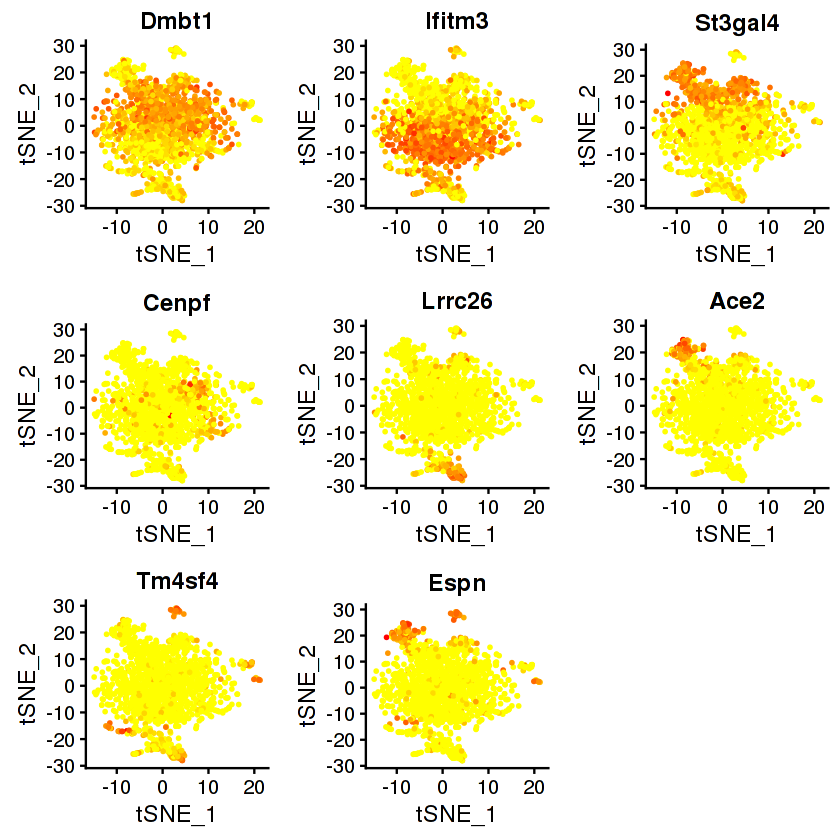

In [48]:
feature.plot(intestine,genes.viz,pt.size = 1)